# Concat(), Append(), Merge(), and Join() Practice

In this tutorial, we will walk through several methods of combining data using pandas. It's geared towards beginner to intermediate levels and will require knowledge on the fundamentals of the pandas DataFrame.

We will walk through four different techniques (concatenate, append, merge, and join) while analyzing average annual labor hours for a handful of countries.

We will also create a plot after every step so we visually understand the different results each data combination technique produces.

The question we are trying to answer is simple but interesting: which countries have citizens putting in the longest work hours and how have these trends been changing over time?

In [64]:
#---Step 0: Import necessary libraries and render plots inline---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

In [65]:
#---Step 1: Read in data---

north_america = pd.read_csv("/Users/cheon/Pandas_Concatenation_Tutorial/north_america_2000_2010.csv", index_col=0)
south_america = pd.read_csv("/Users/cheon/Pandas_Concatenation_Tutorial/south_america_2000_2010.csv", index_col=0)

In [66]:
north_america

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0


In [67]:
south_america

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Chile,2263,2242,2250,2235,2232,2157,2165,2128,2095,2074,2069.6


Woah, that's not what we wanted! By default, the DataFrame.plot() method treats rows as x axis labels, cell values as y axis labels, and columns as lines. The quick fix here is to pivot the axes on our DataFrame using the DataFrame.transpose() method.

To make our visualizations compelte, we'll add a title using the title='string' parameter in the plot method. We can chain these methods together and then use plt.show() to neatly display our line graphs without the line of matplotlib text above the plot.

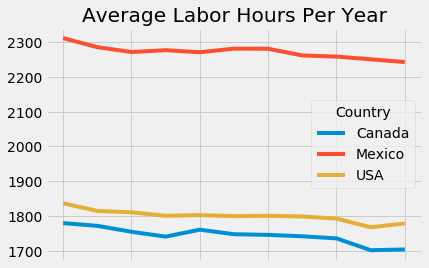

In [68]:
north_america.transpose().plot(title = "Average Labor Hours Per Year")
plt.show()

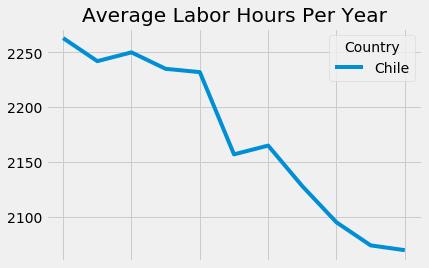

In [69]:
south_america.transpose().plot(title = "Average Labor Hours Per Year")
plt.show()

# Concatenating Americas data

It looks like we have three countries in the north_america DataFrame and one country in our south_america DataFrame. Since these are in two separate plots, it's hard to compare the average labor hours in South America versus North America. If we were able to get all the countries into the same data frame, it would be much easier to do this camparison.

For simple operations where we need to add rows or columns of the same length, the pd.concat() function is perfect. All we have to do is pass in a list of DataFrame objects in the order we would like them concatenated.

-  axis: whether we will concatenate along rows (0) or columns (1) - 0 is default
-  join: can be set to inner, outer, left, or right; explained in more detail later in this tutorial
-  ignore_index: whether or not the original row labels from should be retained

In [70]:
americas = pd.concat([north_america, south_america], axis=0)

americas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6


This is looking like a good start, but we want our data to be as recent as possible. After requesting data on these four countries from later years, the data collection team sent us each year from 2011 to 2015 in separate CSV files.

Let's load in the new data using a for loop along with the string.format() method to automate the process a bit. We'll be putting our americas DataFrame from earlier in to a list named americas_dfs and appending each of these new DataFrames to that list. Finally, we will display the americas_2011 DataFrame using list indexing.

In [71]:
americas_dfs = [americas]

for year in range(2011, 2016):
    filename = "/Users/cheon/Pandas_Concatenation_Tutorial/americas_{}.csv".format(year)
    df = pd.read_csv(filename, index_col=0)
    americas_dfs.append(df)
    
# Display data only for 2011
americas_dfs[1]

,2011
Country,
Canada,1700.0
Chile,2047.4
Mexico,2250.2
USA,1786.0


One thing you might notice is the rows in the americas_2011 DataFrame we just printed are not in the same sequence as the americas DataFrame (pandas automatically alphabetized them). Luckily, the pd.concat() function joins data on index labels (countries, in our case), not sequence, so this won't pose an issue during concatenation. If we wanted to instead concatenate the rows in the order they are currently in, we could pass the argument ignore_index=True. This would result in the indexes being assigned a sequence of integers. It's also important to keep in mind we have to create the list of DataFrames in the order we would like them concatenated, otherwise our years will be out of chronological order.

We can't use the pd.concat() function exactly the same way we did last time, because now we are adding columns instead of rows. This is where axis comes into play. By default, the argument is set to axis=0, which means we are concatenating rows. This time, we will need to pass in axis=1 to indicate we want to concatenate columns. Remember, this will only work if all the tables have the same height (number of rows).

One caveat to keep in mind when concatenating along axis 1 is the title for the row indexes, 'Country', will be dropped. This is because pandas isn't sure whether that title applies to the new row labels that have been added. We can easily fix this by assigning the DataFrame.index.names attribute. Afterwards, let's make another plot to see where we're at.

In [72]:
americas = pd.concat(americas_dfs, axis=1, sort=False)

# Rename index column
americas.index.names = ["Country"]

americas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5


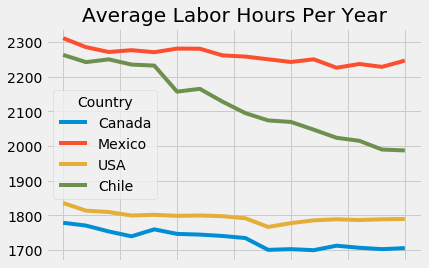

In [73]:
americas.transpose().plot(title = "Average Labor Hours Per Year")
plt.show()

#  Appending data from other continents

Now that we've got a full view of the Americas, we we'd like to see how this compares to the rest of the world. The data collection team has provided CSV files for Asia, Europe, and the South Pacific for 2000 through 2015. Let's load these files in and have a preview. Since europe is a much taller table, we will utilize the DataFrame.head() method to save space by showing only the first 5 rows.

In [74]:
# Read in data for remaining countries
asia = pd.read_csv('/Users/cheon/Pandas_Concatenation_Tutorial/asia_2000_2015.csv', index_col=0)
europe = pd.read_csv('/Users/cheon/Pandas_Concatenation_Tutorial/europe_2000_2015.csv', index_col=0)
south_pacific = pd.read_csv('/Users/cheon/Pandas_Concatenation_Tutorial/south_pacific_2000_2015.csv', index_col=0)

Pandas has a shortcut when you only want to add new rows called the DataFrame.append() method. The syntax is a little different - since it's a DataFrame method, we will use dot notation to call it on our americas object and then pass in the new objects as arguments.

It looks like these new DataFrames have all 16 years as their columns. If any columns were missing from the data we are trying to append, they would result in those rows having NaN values in the cells falling under the missing year columns. Let's run the append method and verify that all the countries have been sucesfully appended by printing DataFrame.index. Then we can plot a line graph to see what the new appended data looks like.

In [75]:
# Pass in list of dataframes
world = americas.append([asia, europe, south_pacific])

world.index

Index(['Canada', 'Mexico', 'USA', 'Chile', 'Israel', 'Japan', 'Korea',
       'Russia', 'Austria', 'Belgium', 'Switzerland', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Italy',
       'Lithuania', 'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden', 'Australia',
       'New Zealand'],
      dtype='object', name='Country')

# Customizing the visualization

Let's make a few customizations to make the plot more readable:

-  Increase size of plot using the figsize=(10,10) argument
-  Use rainbow maps from the matplotlib colormpas documentation given we need more than the default 10 colors
-  Set linewidth=2 to generate thicker lines
-  Overlay legend towards right of the plot using loc="right" into the plt.legend() function
-  Fine tune legend position using bbox_to_anchor=(1.3,0.5)

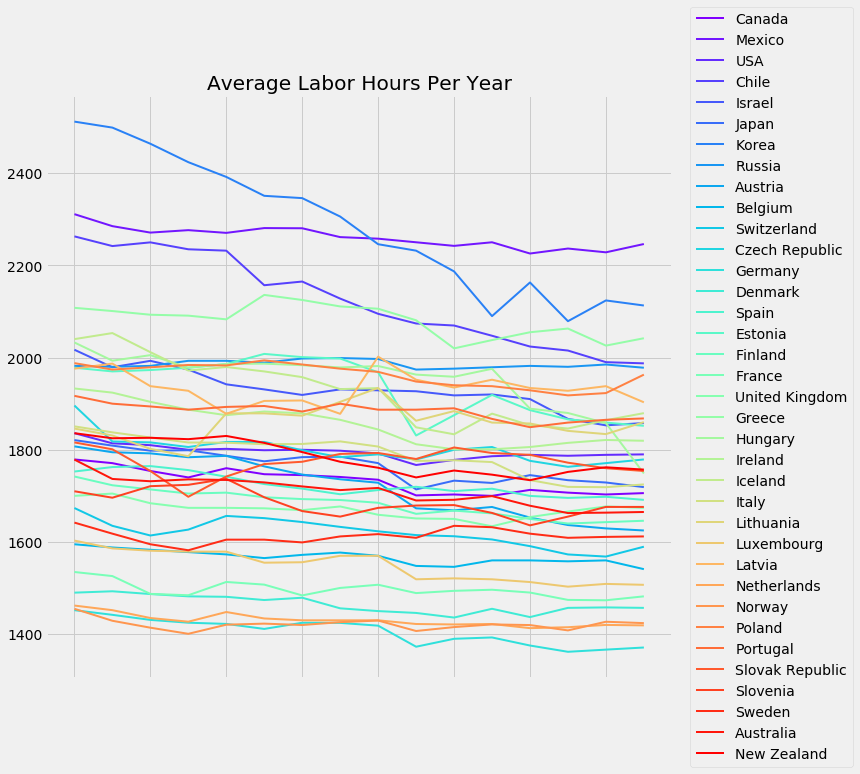

In [76]:
world.transpose().plot(figsize=(10,10), colormap='rainbow', linewidth=2, title='Average Labor Hours Per Year')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))

plt.show()

# A primer on joins

Pandas has options for high performance in-memory merging and joining. When we need to combine very large DataFrames, joins serve as a powerful way to perform these operations swiftly.

Joins can only be done on two DataFrames at a time, denoted as left and right tables. The key is the common column that the two DataFrames will be joined on. It's a good practice to use keys which have unique values throughout the column to avoid unintended duplication of row values.

There are four basic ways to handle the join (inner, left, right, and outer), depending on which rows must retain their data.

-  An inner join is the simplest join, this will only retain rows in which both tables share a key value
-  A left join keeps all rows that occur in the primary (left) table, and the right table will only concatenate on rows where it shares a key value with the left. NaN values will be filled in for cells where the there's no matching key value
-  A right join is the same concept as a left join, but keeps all rows occuring in the right table. The resulting DataFrame will have any potential NaN values on the left side
-  A full outer join retains all rows occuring in both tables and NaN values can show up on either side of your resulting DataFrame

# Merging historical labor data

In order to see real trends emerge, we want to be able to see as much historical data as possible. The data collection team was kind enough to send data from 1950 to 2000, let's load it in and take a look.

In [77]:
historical = pd.read_csv('/Users/cheon/Pandas_Concatenation_Tutorial/historical.csv', index_col=0)

historical.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1779.5,1774.90,1773.70,1786.50,1797.60,1793.400,1782.700,1783.600,1768.40,1778.8
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1619.200,1637.150,1648.500,1641.65,1654.0
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1662.9,1625.79,1602.72,1558.59,1558.59,1515.835,1500.295,1510.315,1513.33,1514.5
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1789.5,1767.50,1766.00,1764.50,1773.00,1771.500,1786.500,1782.500,1778.50,1778.5
Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1673.10,1684.80,1685.80,1706.20,1685.500,1658.900,1648.600,1656.60,1678.4


You'll notice there are a lot of NaN values, especially in the earlier years. This simply means that there was no data collected for those countries in the earlier years. Putting a 0 in those cells would be misleading, as it would imply that no one spent any hours working that year! Instead, NaN represents a null value, meaning "not a number". Having null values will not affect our DataFrame merging since we will use the row labels (index) as our key.

Note that the historical table has 39 rows, even though we are only analyzing 36 countries in our world table. Dropping the three extra rows can be automatically taken care of with a right join using merge(). We will treat world as our primary table and want this to be on the right side of the resulting DataFrame and historical on the left, so the years (columns) stay in chronological order. The columns in these two tables are all distinct, that means we will have to find a key to join on. In this case, the key will be the row indexes (countries).

In [78]:
world_historical = pd.merge(historical, world, left_index=True, right_index=True, how='right')

print(world_historical.shape)
world_historical.head()

(36, 66)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1745.0,1741.0,1735.0,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2280.6,2261.4,2258.0,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1960.0,1975.5,1978.0,1980.0,1970.5,1992.5,1990.0,1962.0,1936.5,1947.0,...,1800.0,1798.0,1792.0,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.0,2128.0,2095.0,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1919.0,1931.0,1929.0,1927.0,1918.0,1920.0,1910.0,1867.0,1853.0,1858.0


When using this function, the first two arguments will always be the left and right DataFrames, respectively. Then, we want to set left_index=True and right_index=True to specify that the indexes will be our key values and so we can retain the countries as row labels (pandas would otherwise change the row indexes to a sequence of integers.) Finally, we pass in how='right' to indicate a right join.

The right join will ensure we only keep the 36 rows from the right table and discard the extra 3 from the historical table. Let's print the shape of the resulting DataFrame and display the head to make sure everything turned out correct.

# A quicker way to join

Now that we've done it the hard way and understand table merging conceptually, let's try a more elegant technique. Pandas has a clean method to join on indexes which is perfect for our situation.

The DataFrame.join() method lets us use dot notation on our left table, then pass in the right table and how as an argument. This eliminates the need to specify the right and left index arguments like we did in the previous function. If on=None, the join key will be the row index. Let's observe how the nulls are affecting our analysis by taking a look at the DataFrame head.

In [79]:
world_historical = historical.join(world, how='right')

world_historical.shape

(36, 66)

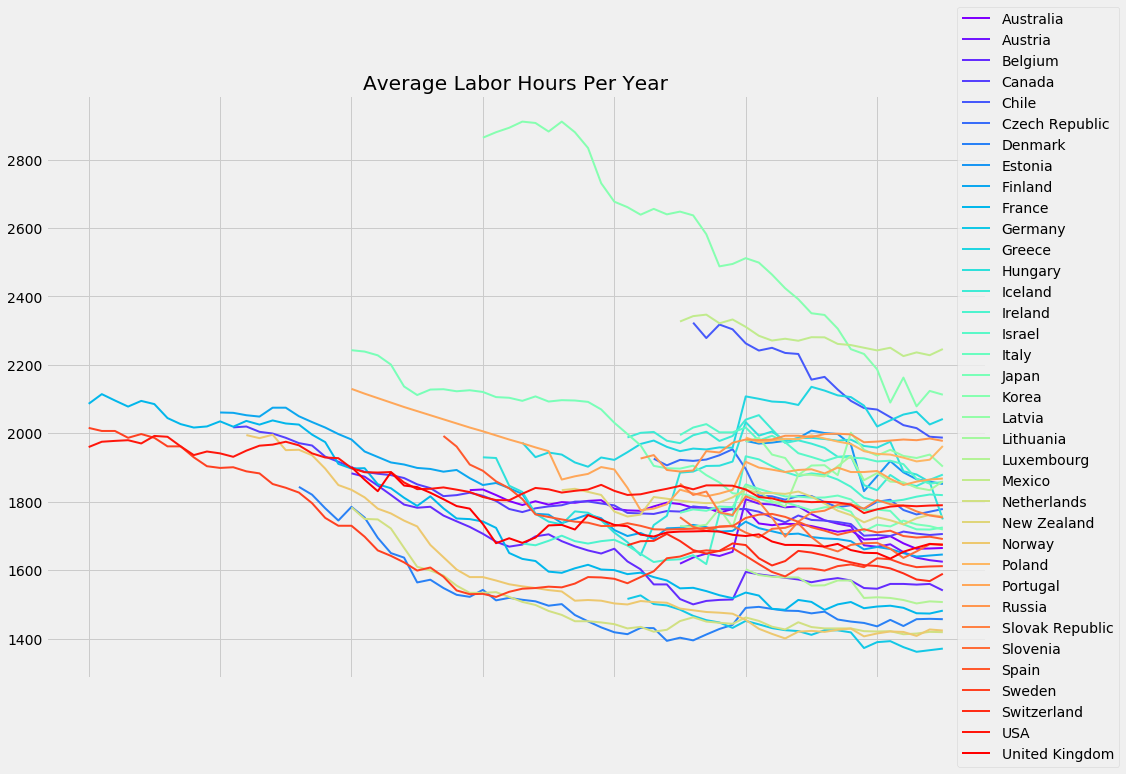

In [80]:
world_historical.sort_index(inplace=True)
world_historical.transpose().plot(figsize=(15,10), colormap='rainbow', linewidth=2, title='Average Labor Hours Per Year')
plt.legend(loc='right', bbox_to_anchor=(1.15, 0.5))
plt.show()

# Summary

To summarize:

-  pd.concat() function: the most multi-purpose and can be used to combine multiple DataFrames along either axis
-  DataFrame.append() method: a quick way to add rows to your DataFrame, but not applicable for adding columns
-  pd.merge() function: great for joining two DataFrames together when we have one column (key) containing common values
-  DataFrame.join() method: a quicker way to join two DataFrames, but works only off index labels rather than columns